<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/tomato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/Tomato_diseases.zip','r') as zipObj:
     zipObj.extractall('Tomato Leaf Disease Images')

In [ ]:
!pip install split-folders[full]

In [ ]:
import splitfolders
input_folder = '/content/Tomato Leaf Disease Images/Tomato_diseases'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 16012 files [00:03, 5277.67 files/s]


In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS =25

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Tomato Leaf Disease Images/Tomato_diseases")

Found 16011 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 11203 images belonging to 10 classes.


In [ ]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 1597 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 3211 images belonging to 10 classes.


In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =10
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


In [ ]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [ ]:
history = model.fit(

    train_generator,
    steps_per_epoch= 88, ## train data set / batch size
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =12,## validation data set/ batch size
    verbose=1,
    epochs =25
)

Epoch 1/25
88/88 [==============================] - 234s 3s/step - loss: 1.0473 - accuracy: 0.6588 - val_loss: 0.5459 - val_accuracy: 0.8190
Epoch 2/25
88/88 [==============================] - 222s 3s/step - loss: 0.4589 - accuracy: 0.8471 - val_loss: 0.5052 - val_accuracy: 0.8210
Epoch 3/25
88/88 [==============================] - 220s 2s/step - loss: 0.3344 - accuracy: 0.8882 - val_loss: 0.3923 - val_accuracy: 0.8678
Epoch 4/25
88/88 [==============================] - 207s 2s/step - loss: 0.2900 - accuracy: 0.9017 - val_loss: 0.2955 - val_accuracy: 0.8952
Epoch 5/25
88/88 [==============================] - 220s 3s/step - loss: 0.2433 - accuracy: 0.9173 - val_loss: 0.3102 - val_accuracy: 0.8984
Epoch 6/25
88/88 [==============================] - 232s 3s/step - loss: 0.2242 - accuracy: 0.9237 - val_loss: 0.2527 - val_accuracy: 0.9141
Epoch 7/25
88/88 [==============================] - 226s 3s/step - loss: 0.1952 - accuracy: 0.9341 - val_loss: 0.2690 - val_accuracy: 0.9056
Epoch 8/25
88

In [ ]:
scores = model.evaluate(test_generator,verbose=0)
scores

[0.20288246870040894, 0.9374026656150818]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

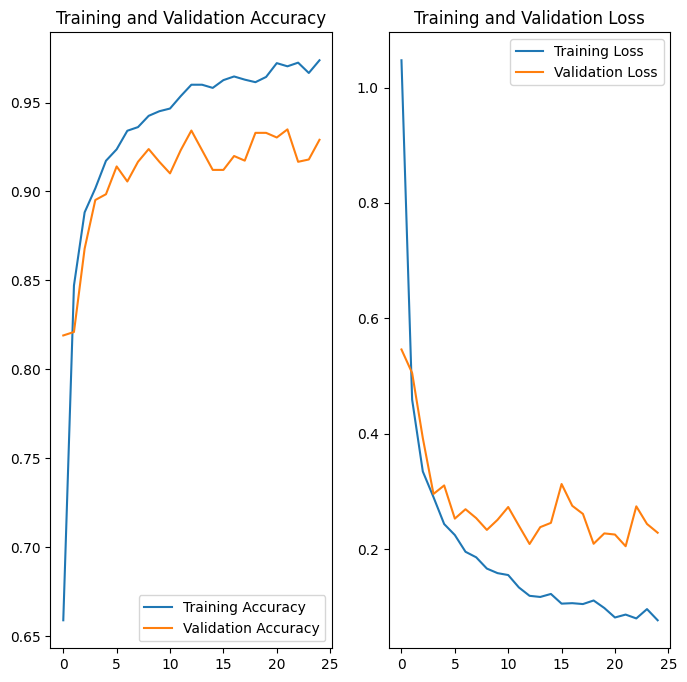

In [ ]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Tomato__Target_Spot
4/4 [==============================] - 2s 43ms/step
Predicted label:  Tomato__Target_Spot


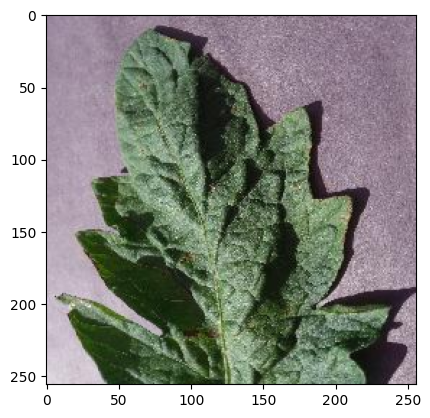

In [ ]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


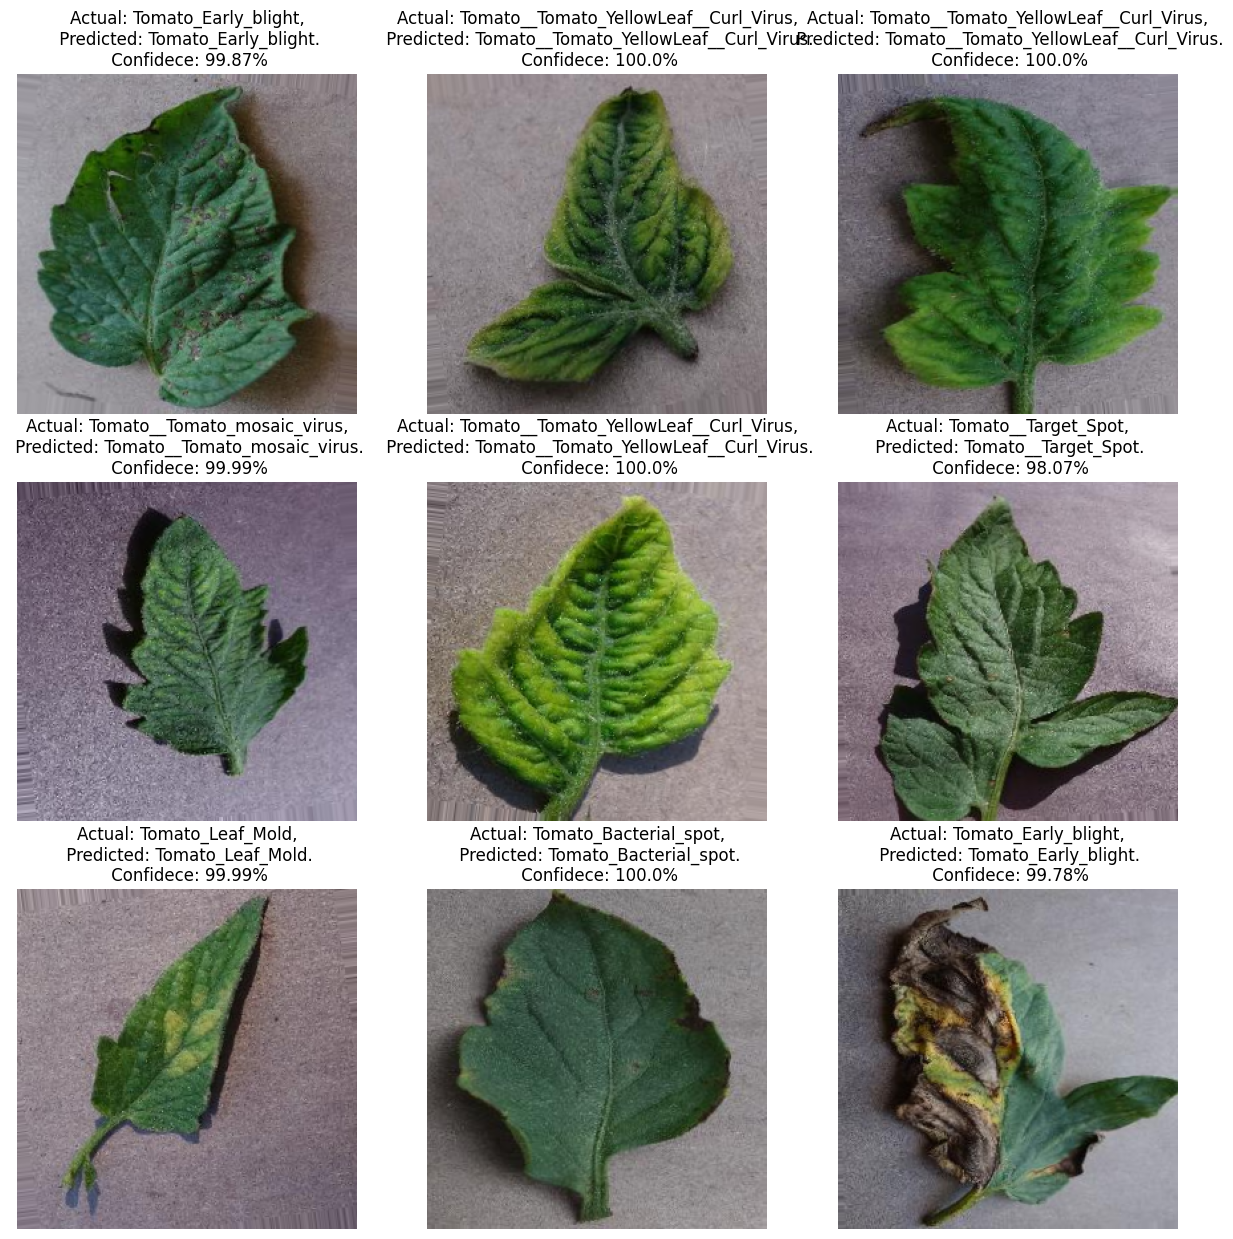

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [ ]:
model.save("/content/gdrive/MyDrive/tomato_disease_classification_models/trained_model_tomato_v1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
with open('/content/gdrive/MyDrive/tomato_disease_classification_models/tflite_quant_model_tomato_v1.tflite', 'wb') as f:
   f.write(tflite_quant_model)

In [ ]:
import numpy
test_images = []
test_labels = []
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']

  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)

  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy

In [ ]:
# Passing the Integer Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('/content/gdrive/MyDrive/tomato_disease_classification_models/tflite_quant_model_tomato_v1.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Quantized TFLite Model Test Accuracy:', test_accuracy*100)
print('Baseline Keras Model Test Accuracy:', scores*100)

Evaluated on 0 results so far.
Evaluated on 100 results so far.
Evaluated on 200 results so far.
Evaluated on 300 results so far.
Evaluated on 400 results so far.
Evaluated on 500 results so far.
Evaluated on 600 results so far.
Evaluated on 700 results so far.
Evaluated on 800 results so far.
Evaluated on 900 results so far.
Evaluated on 1000 results so far.
Evaluated on 1100 results so far.
Evaluated on 1200 results so far.
Evaluated on 1300 results so far.
Evaluated on 1400 results so far.
Evaluated on 1500 results so far.
Evaluated on 1600 results so far.
Evaluated on 1700 results so far.
Evaluated on 1800 results so far.
Evaluated on 1900 results so far.
Evaluated on 2000 results so far.
Evaluated on 2100 results so far.
Evaluated on 2200 results so far.
Evaluated on 2300 results so far.
Evaluated on 2400 results so far.
Evaluated on 2500 results so far.
Evaluated on 2600 results so far.
Evaluated on 2700 results so far.
Evaluated on 2800 results so far.
Evaluated on 2900 results 